### Your details

Your Name: Ashik Kannampilly Janardhanan

Your ID number: 25032615


General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).


In [ ]:
from typing import List, Tuple
from pandas import DataFrame, Series

# Task 1: Linear Algebra

## Custom Exception

Here we define the CustomException class, which is the one that you should use to raise exceptions in your functions when needed (an example is provided for the vector_sum function, the rest will need to be added by you). **Do not use any other type of exception.**

In [ ]:
class CustomException(Exception):
    pass  # You don't need to add anything here.

## Code

Here we provide the template for the required functions. **Do not change the names of the functions as they will be used for automatic testing. Also do not define any other functions with the exact same name anywhere else throughout the notebook.**

In [ ]:
def scalar_mul(vec: List[float], scalar: float) -> List[float]:
    return [scalar * v for v in vec]
    pass

In [ ]:
def vector_sum(vec_1: List[float], vec_2: List[float]) -> List[float]:
    # Your code here


    # Example of how to raise exceptions (here is given, in other functions you need to implement it):
    if len(vec_1) != len(vec_2):
        raise CustomException("Vectors must be of the same size")  # The error message is optional

    return [a + b for a, b in zip(vec_1, vec_2)]

In [ ]:
def vector_subtract(vec_1: List[float], vec_2: List[float]) -> List[float]:
    # Your code here
    if len(vec_1) != len(vec_2):
        raise CustomException("Vectors must be of the same size")
    return [a - b for a, b in zip(vec_1, vec_2)]
    pass

In [ ]:
def dot_product(vec_1: List[float], vec_2: List[float]) -> float:
    # Your code here
    if len(vec_1) != len(vec_2):
        raise CustomException("Vectors must be of the same size")
    return sum(a * b for a, b in zip(vec_1, vec_2))
    pass

In [ ]:
def cross_product(vec_1: List[float], vec_2: List[float]) -> List[float]:
    # Your code here
    if len(vec_1) != 3 or len(vec_2) != 3:
        raise CustomException("Cross product is only defined for 3D vectors")
    return [
        vec_1[1]*vec_2[2] - vec_1[2]*vec_2[1],
        vec_1[2]*vec_2[0] - vec_1[0]*vec_2[2],
        vec_1[0]*vec_2[1] - vec_1[1]*vec_2[0]
    ]
    pass

In [ ]:
def matrix_size(matrix: List[List[float]]) -> Tuple[int, int]:
    # Your code here
    if not matrix or not matrix[0]:
        raise CustomException("Matrix cannot be empty")
    return len(matrix), len(matrix[0])
    pass

In [ ]:
def matrix_sum(matrix_1: List[List[float]], matrix_2: List[List[float]]) -> List[List[float]]:
    # Your code here
    if matrix_size(matrix_1) != matrix_size(matrix_2):
        raise CustomException("Matrices must be of the same size")
    return [[(r1+r2) for r1, r2 in zip(row1, row2)] for row1,row2 in zip(matrix_1,matrix_2)]
    pass

In [ ]:
def matrix_subtract(matrix_1: List[List[float]], matrix_2: List[List[float]]) -> List[List[float]]:
    # Your code here
    if matrix_size(matrix_1) != matrix_size(matrix_2):
        raise CustomException("Matrices must be of the same size")
    return [[(r1-r2) for r1, r2 in zip(row1, row2)] for row1,row2 in zip(matrix_1,matrix_2)]
    pass

In [ ]:
def matrix_vec_mul(matrix: List[List[float]], vec: List[float]) -> List[float]:
    # Your code here
    if len(matrix[0]) != len(vec):
        raise CustomException("Matrix columns must match vector size")
    return [dot_product(row, vec) for row in matrix]

    pass

In [ ]:
def matrix_mul(matrix_1: List[List[float]], matrix_2: List[List[float]]) -> List[List[float]]:
    # Your code here
    if len(matrix_1[0]) != len(matrix_2):
        raise CustomException("Matrix A columns must match Matrix B rows")
    result = []
    for row in matrix_1:
        new_row = []
        for j in range(len(matrix_2[0])):
            col = [matrix_2[i][j] for i in range(len(matrix_2))]
            new_row.append(dot_product(row, col))
        result.append(new_row)
    return result
    pass

In [ ]:
def matrix_determinant(matrix: List[List[float]]) -> float:
    # Your code here
    if len(matrix) != 2 or len(matrix[0]) != 2:
        raise CustomException("Only 2x2 matrices are supported")
    return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]
    pass

In [ ]:
def inverse_matrix(matrix: List[List[float]]) -> List[List[float]]:
    # Your code here
    if len(matrix) != 2 or len(matrix[0]) != 2:
        raise CustomException("Only 2x2 matrices are supported")
    det = matrix_determinant(matrix)
    if det == 0:
        raise CustomException("Matrix is non-invertible")
    return [
        [ matrix[1][1]/det, -matrix[0][1]/det],
        [-matrix[1][0]/det,  matrix[0][0]/det]
    ]
    pass

## Discussion

Provide any discussion elements

task 1: Vector operations:

scalar_mul multiplies each element of a vector by a scalar.

vector_sum and vector_subtract perform element-wise addition and subtraction and raise a CustomException if vector sizes differ.

dot_product calculates the sum of element-wise products, and cross_product computes the 3D vector cross product(make use of diterminant equation).

task 2:Matrix operations:

matrix_size returns the number of rows and columns.

matrix_sum and matrix_subtract perform element-wise addition and substraction on matrices of the same size.

matrix_vec_mul multiplies a matrix by a vector using the dot product.

matrix_mul multiplies two matrices by taking the dot product of rows and columns.

matrix_determinant and inverse_matrix handle 2x2 matrices only and raise an exceptions for invalid sizes or non-invertible matrices.

# Task 2: Probability Theory

## Option ? (which option did you pick?)

I chose the option requiring two problems:
1. A discrete random variable experiment (Dice Gamble with Uniform Distribution).  
2. A continuous random variable experiment (Test Scores with Normal Distribution).


## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).
## Approach

For the discrete case (dice gamble), I simulated 1000 dice rolls using a uniform distribution between 1 and 6.  
I then mapped each dice outcome to a gamble result according to the rules:  
- 1, 2, 3 → -1  
- 4 → 0  
- 5 → +1  
- 6 → +2  

For the continuous case (test scores), I simulated 10,000 exam scores using a normal distribution with mean = 50 and standard deviation = 15. Then i limited my scores to remain in the [0,100] range.  
I then applied the reward rules:  
- score < 50 → 0  
- 50 ≤ score < 75 → 5  
- score ≥ 75 → 10  

For both experiments, I calculated the expected value (mean) and standard deviation manually without using built-in libraries. I also plotted histograms to visualize both the input and output distributions.  




## Manual Calculations

(Provide details of the manual calculations)

Dice case:

Rolled the dice 3 times and got ouput: 2,4,6

Mean = (2+4+6)/3=12/3= 4

variance= (4+0+4)/3=8/3= 2.67

standard deviation = root of 2.67= 1.63

Results obtained for gamble : -1,0,2

Mean = (−1+0+2)/3=1/3 = 0.33

variance= (1.78+0.11+2.78)/3=4.67/3 = 1.56

standard deviation = root of 1.56= 1.25


test score case:

Test score for 5 students: 40,55,70,80,90

Mean = (40+55+70+80+90)/5=335/5=67

variance= (729+144+9+169+529)/5=1580/5=316

standard deviation = root of 316= 17.78

Reward obtained : 0,5,5,10,10

Mean = (0+5+5+10+10)/5=30/5=6

variance= (36+1+1+16+16)/5=70/5=14

standard deviation = root of 14= 3.74




Mean Dice: 3.484
Std Dice: 1.7209718184793148
Mean Gamble: -0.011
Std Gamble: 1.1631332683746949


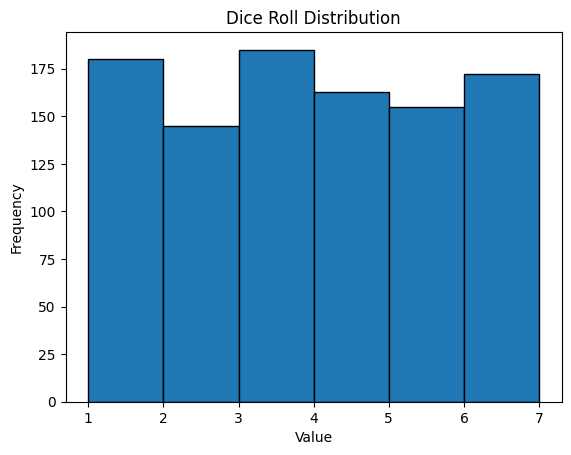

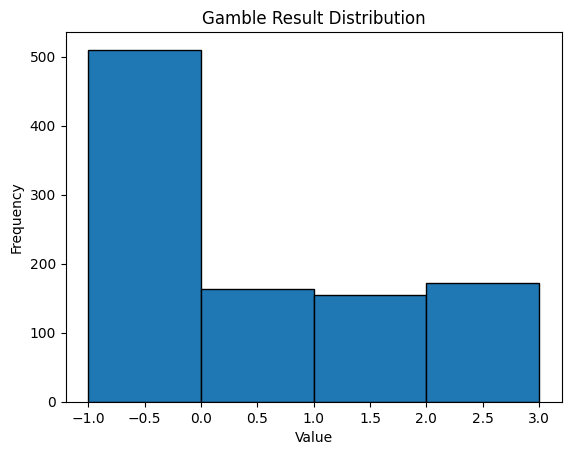

Mean Test Scores: 49.992405960594596
Std Test Scores: 14.86043233128818
Mean Reward: 2.747
Std Reward: 2.9075747625813513


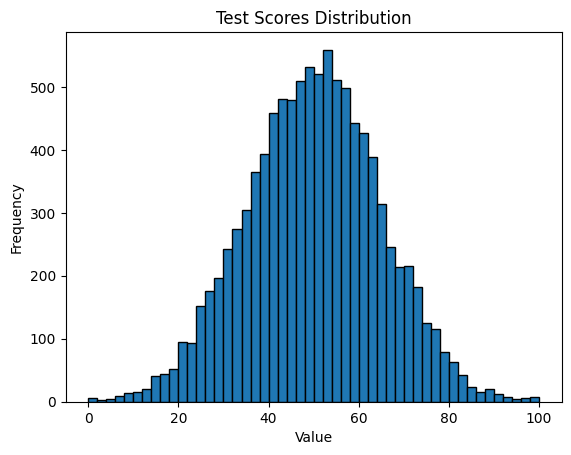

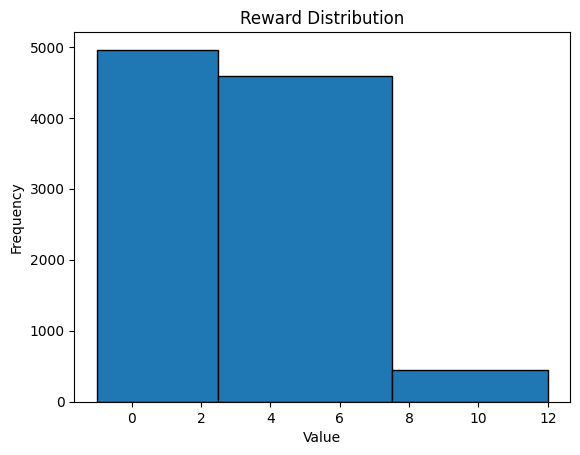

In [ ]:
import random
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
def mean(x):
    return sum(x) / len(x)

def std(x):
    m = mean(x)
    return (sum((i - m)**2 for i in x) / len(x))**0.5

def plot_histogram(x, bins, title):
    plt.hist(x, bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# TASK 2A: DISCRETE RANDOM VARIABLE – DICE GAMBLE
dice = []
gamble = []

for i in range(1000):
    roll = random.randrange(1, 7)
    dice.append(roll)
    if roll in (1, 2, 3):
        gamble.append(-1)
    elif roll == 4:
        gamble.append(0)
    elif roll == 5:
        gamble.append(1)
    else:  # roll == 6
        gamble.append(2)

print("Mean Dice:", mean(dice))
print("Std Dice:", std(dice))
print("Mean Gamble:", mean(gamble))
print("Std Gamble:", std(gamble))
plot_histogram(dice, bins=range(1, 8), title="Dice Roll Distribution")
plot_histogram(gamble, bins=range(-1, 4), title="Gamble Result Distribution")

# TASK 2B: CONTINUOUS RANDOM VARIABLE – TEST SCORES REWARD
test_scores = []
reward = []

for _ in range(10000):
    score = max(0, min(100, random.gauss(50, 15)))
    test_scores.append(score)
    if score < 50:
        reward.append(0)
    elif score < 75:
        reward.append(5)
    else:
        reward.append(10)

print("Mean Test Scores:", mean(test_scores))
print("Std Test Scores:", std(test_scores))
print("Mean Reward:", mean(reward))
print("Std Reward:", std(reward))
plot_histogram(test_scores, bins=50, title="Test Scores Distribution")
plot_histogram(reward, bins=[-1, 2.5, 7.5, 12], title="Reward Distribution")


# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:
# import dependencies
import numpy as np
import pandas as pd

# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

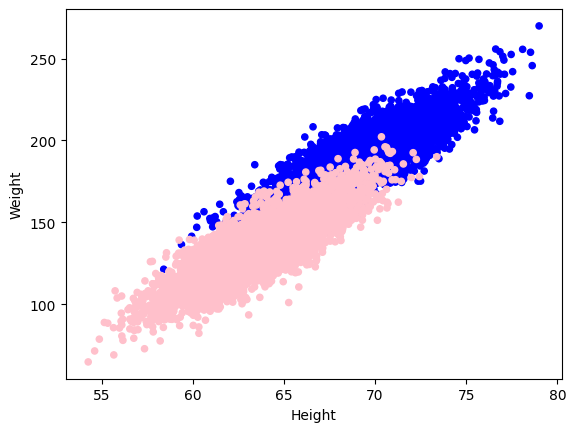

In [ ]:
import matplotlib.pyplot as plt
color={'Male':'blue','Female':'pink'}
data.plot(kind='scatter',x='Height',y='Weight',c=data['Gender'].map(color))
plt.show()

#### Discuss: Do you think there is resonable separation?
yes there is a resonable separation

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Your code here
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

### Test the algorithm
Using the test data

In [ ]:
from sklearn.metrics import accuracy_score

################################
y_pred=model.predict(X_test)
print(y_pred,"\n",y_test.values)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

['Female' 'Male' 'Male' ... 'Female' 'Male' 'Male'] 
 ['Female' 'Male' 'Male' ... 'Male' 'Male' 'Male']
0.8763636363636363


### Plot the random samples

['Male' 'Male' 'Male' ... 'Male' 'Male' 'Male']


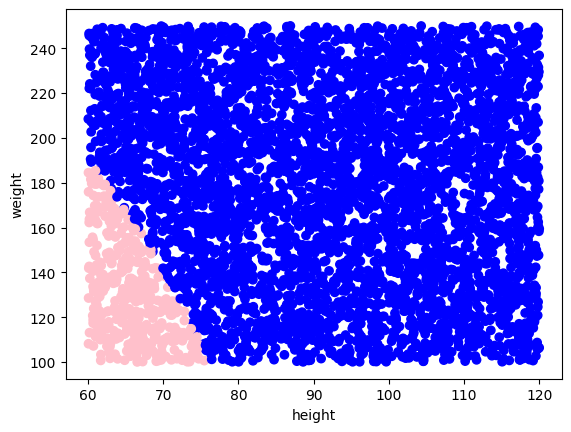

In [ ]:
################################
import random
random_samples=[]
for i in range(5000):
  h=random.uniform(60,120)
  w=random.uniform(100,250)
  random_samples.append([h,w])
random_df = pd.DataFrame(random_samples, columns=['Height', 'Weight'])
random_predict=model.predict(random_df)
print(random_predict)
h1=[i[0] for i in random_samples]
w1=[i[1] for i in random_samples]
c1=[color[i] for i in random_predict]
plt.scatter(h1,w1,c=c1)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()


In [ ]:
m1=[[1,2],[3,4]]
m2=[[5,6],[7,8]]
print(m1,'\n',m2)

[[1, 2], [3, 4]] 
 [[5, 6], [7, 8]]


In [ ]:
print("no of rows is : ",len(m1))
print("no of columns is : ",m1[1])

no of rows is :  2
no of columns is :  3


In [ ]:
for i in range(len(m1)):
  for j in range(len(m1[1])):
    print(m1[i][j])